<a href="https://colab.research.google.com/github/KimJisanER/KimJisan_TS/blob/main/12_21_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

kaggle: Challenges in Representation Learning: Facial Expression Recognition Challenge



In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

In [ ]:
import pandas as pd

In [11]:
#데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/TF걸음마/icml_face_data.csv')
#icml_face_data.csv 파일에 훈련용, 검증용, 테스트용 데이터가 포함됨

In [18]:
#데이터 전처리 함수
def preprocessing(data):
  image = np.zeros(shape=(len(data), 48, 48)) #빈 넘파이형태(48*48)
  label = np.array(list(map(int, data['emotion'])))
  for i, row in enumerate(data.index):
    df = np.fromstring(data[' pixels'][row], dtype=int, sep=' ')
    df= np.reshape(df,(48,48))
    image[i] = df
  return image,label

In [19]:
# Train, Validation, Test 데이터 구분
x_train, y_train = preprocessing(data[data[' Usage']=='Training'])
x_val, y_val = preprocessing(data[data[' Usage']=='PrivateTest'])
x_test, y_test = preprocessing(data[data[' Usage']=='PublicTest'])

In [20]:
x_train.shape, x_val.shape, x_test.shape

((28709, 48, 48), (3589, 48, 48), (3589, 48, 48))

In [23]:
#데이터 전처리(shape 변경)
print(x_train.shape, x_val.shape, x_test.shape)
x_train = x_train.reshape((x_train.shape[0], 48, 48, 1))
x_val = x_val.reshape((x_val.shape[0], 48, 48, 1))
x_test = x_test.reshape((x_test.shape[0], 48, 48, 1))
print(x_train.shape, x_val.shape, x_test.shape)

(28709, 48, 48, 1) (3589, 48, 48) (3589, 48, 48)
(28709, 48, 48, 1) (3589, 48, 48, 1) (3589, 48, 48, 1)


In [24]:
x_train = x_train.astype('float32')/x_train.max()
x_val = x_val.astype('float32')/x_val.max()
x_test = x_test.astype('float32')/x_test.max()

CNN #1

In [33]:
model = Sequential([
                    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(7, activation='softmax')
])
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3) 

# 훈련(학습)
history = model.fit(x_train, y_train,  validation_data=(x_val, y_val), epochs=30, batch_size=64, callbacks=[early_stopping])

Epoch 1/30
449/449 [==============================] - 80s 175ms/step - loss: 1.6357 - accuracy: 0.3645 - val_loss: 1.5257 - val_accuracy: 0.4210
Epoch 2/30
449/449 [==============================] - 69s 154ms/step - loss: 1.4376 - accuracy: 0.4560 - val_loss: 1.4234 - val_accuracy: 0.4539
Epoch 3/30
449/449 [==============================] - 68s 151ms/step - loss: 1.3326 - accuracy: 0.4939 - val_loss: 1.3830 - val_accuracy: 0.4687
Epoch 4/30
449/449 [==============================] - 93s 207ms/step - loss: 1.2413 - accuracy: 0.5331 - val_loss: 1.3839 - val_accuracy: 0.4714
Epoch 5/30
449/449 [==============================] - 71s 157ms/step - loss: 1.1526 - accuracy: 0.5712 - val_loss: 1.4130 - val_accuracy: 0.4728
Epoch 6/30
449/449 [==============================] - 69s 154ms/step - loss: 1.0640 - accuracy: 0.6086 - val_loss: 1.3809 - val_accuracy: 0.4971
Epoch 7/30
449/449 [==============================] - 68s 153ms/step - loss: 0.9761 - accuracy: 0.6438 - val_loss: 1.3867 - val_ac

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 64)        

In [36]:
# CNN
img_height = 48
img_width = 48
ch = 1

model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, ch)),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(7, activation='softmax')
])
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3) 

# 훈련(학습)
history = model.fit(x_train, y_train,  validation_data=(x_val, y_val), epochs=30, batch_size=64, callbacks=[early_stopping])

Epoch 1/30
449/449 [==============================] - 86s 191ms/step - loss: 1.6597 - accuracy: 0.3394 - val_loss: 1.4643 - val_accuracy: 0.4422
Epoch 2/30
449/449 [==============================] - 86s 191ms/step - loss: 1.3906 - accuracy: 0.4724 - val_loss: 1.3341 - val_accuracy: 0.4926
Epoch 3/30
449/449 [==============================] - 85s 190ms/step - loss: 1.2825 - accuracy: 0.5133 - val_loss: 1.2754 - val_accuracy: 0.5104
Epoch 4/30
449/449 [==============================] - 85s 190ms/step - loss: 1.2041 - accuracy: 0.5476 - val_loss: 1.2616 - val_accuracy: 0.5116
Epoch 5/30
449/449 [==============================] - 86s 191ms/step - loss: 1.1476 - accuracy: 0.5656 - val_loss: 1.1935 - val_accuracy: 0.5469
Epoch 6/30
449/449 [==============================] - 86s 192ms/step - loss: 1.0934 - accuracy: 0.5856 - val_loss: 1.2182 - val_accuracy: 0.5400
Epoch 7/30
449/449 [==============================] - 87s 193ms/step - loss: 1.0473 - accuracy: 0.6043 - val_loss: 1.1927 - val_ac

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 64)        

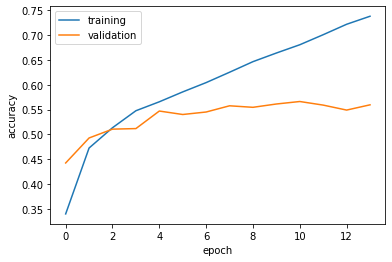

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'])

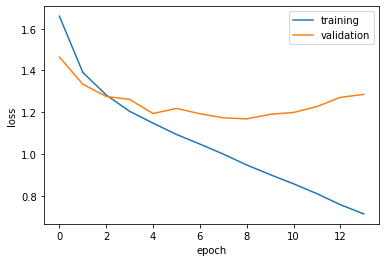

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'])

In [40]:
oss, acc = model.evaluate(x_test, y_test)
print('test정확도:', acc)

113/113 [==============================] - 3s 27ms/step - loss: 1.3172 - accuracy: 0.5570
test정확도: 0.5569796562194824
